---
# 3. Análisis Exploratorio de Datos (EDA) - Consumo Energía Renovable EE.UU.
---
## Objetivos del Notebook
* Explorar visual y estadísticamente el dataset *limpio*.
* Identificar tendencias, patrones y relaciones clave.
* Generar insights sobre el consumo de energía renovable por fuente y sector.
* Formular hipótesis basadas en los datos.

## 3.2. Configuración del Entorno

* Importación de librerías (pandas, numpy, matplotlib, seaborn).

In [31]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Configuración de estilos de visualización.

In [32]:
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') # Puedes elegir otro estilo que te guste
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de figura por defecto

* Definición de rutas y carga del dataset *procesado*.

In [33]:
try:
    # Ajusta la ruta y el nombre del archivo según sea necesario
    df_processed = pd.read_csv('../data/03_processed/dataset_limpio.csv', index_col='datetime', parse_dates=True)
except FileNotFoundError:
    print("Error: Archivo de datos procesados no encontrado. Asegúrate de haber ejecutado el Notebook 02.")

In [34]:
# Definiendo las columnas de interes para el análisis
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
    'Biomass Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel' 
]

## 3.3. Análisis Global de Consumo

**Objetivo:** Entender la tendencia general del consumo total de energía renovable.

**Preguntas:**
* ¿Ha aumentado, disminuido o se ha mantenido estable el consumo total a lo largo del tiempo?
* ¿Existen periodos de crecimiento acelerado o desaceleración?
* ¿Se observa alguna estacionalidad general a simple vista?

* Consumo Total de Energía para cada Sector en EU entre 1973 - 2024

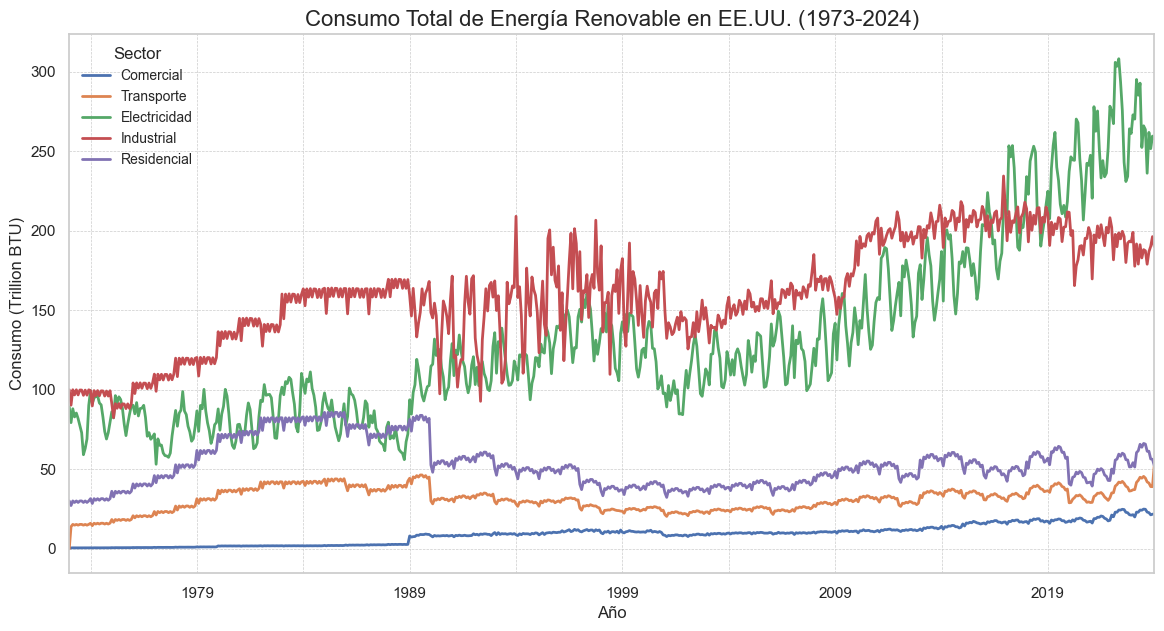

In [ ]:
plt.figure(figsize=(14, 7))
df_processed_1 = df_processed['Total Renewable Energy']
df_processed_1[df_processed['Sector'] == 'Commercial'].plot(kind = 'line', linewidth=2, label='Comercial')
df_processed_1[df_processed['Sector'] == 'Transportation'].plot(kind = 'line', linewidth=2, label='Transporte')
df_processed_1[df_processed['Sector'] == 'Electric Power'].plot(kind = 'line',linewidth=2, label='Electricidad')
df_processed_1[df_processed['Sector'] == 'Industrial'].plot(kind = 'line',linewidth=2, label='Industrial')
df_processed_1[df_processed['Sector'] == 'Residential'].plot(kind = 'line',linewidth=2, label='Residencial')
plt.title('Consumo Total de Energía Renovable en EE.UU. por Sector (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.legend(title='Sector', fontsize=10, title_fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

* Consumo Total Unificado

<Figure size 1400x700 with 0 Axes>

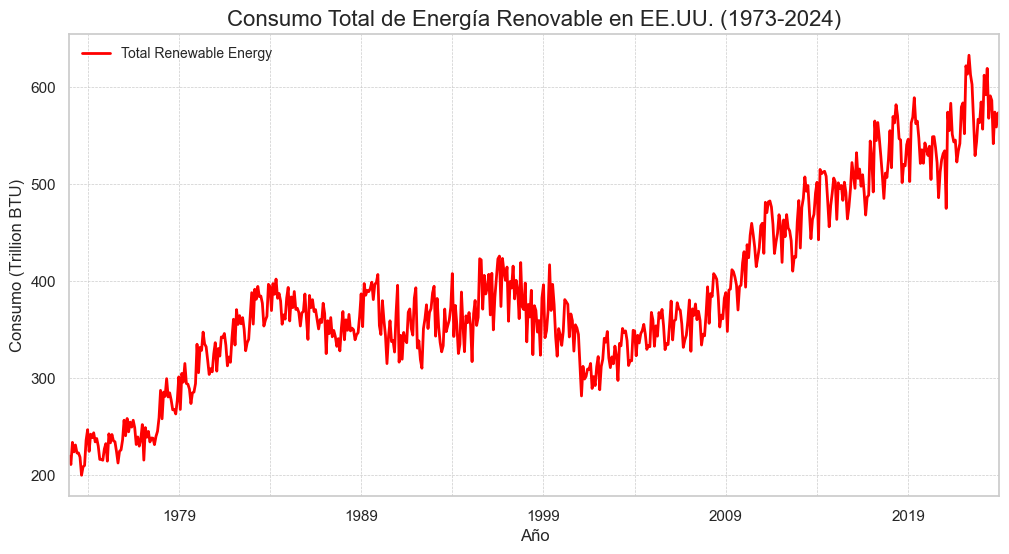

In [42]:
plt.figure(figsize=(14, 7))
df_processed_2 = df_processed.groupby('datetime').agg({'Total Renewable Energy': 'sum'})
df_processed_2.plot(kind='line', linewidth=2, label='Consumo Total', color ='red')
plt.title('Consumo Total de Energía Renovable en EE.UU. (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='', fontsize=10, title_fontsize=12)
plt.show()

In [44]:
# # Estadísticas descriptivas del total
print("Estadísticas Descriptivas del Consumo Total Calculado:")
print(df_processed_2.describe())

Estadísticas Descriptivas del Consumo Total Calculado:
       Total Renewable Energy
count              613.000000
mean               385.361395
std                 93.107871
min                200.137000
25%                333.747500
50%                366.553500
75%                440.299500
max                632.616000


## **Respuestas de las Preguntas de la Sub-Sección**

---

*R/1*. Al observar la gráfica obtenida del consumo total de energía renovable en el intervalo de tiempo desde 1973 y 2024 para los diferentes sectores en conjunto, se puede apreciar que el consumo total de energía renovable ha aumentado significativamente a lo largo de estos años, marcando un crecimiento constante y sostenido. Esto sugiere que la transición hacia fuentes de energía renovable ha sido un proceso gradual pero firme, con un aumento en la demanda y la disponibilidad de energías limpias.

*R/2*. En la gráfica se observa diferentes periodos por lo cuales la energía renovable ha marcado cierta tendencia, comenzando desde 1973 hasta 1984, se observa un periodo de crecimiento moderado marcando una etapa de inicio de la transición, en el cual las primeras fuentes de energías renovables como las hidroeléctricas comenzaron a tener un mayor impacto en la matriz energética de EEUU, esto debido a que anteriormente la generación de energía era dominado principalmente por los combustibles fósiles como el petróleo y el carbón, sin embargo en este mismo año ocurre una crisis debido a la escacez del petróleo [(Crisis del petróleo de 1973)](https://es.wikipedia.org/wiki/Crisis_del_petr%C3%B3leo_de_1973). 

A partir de 1984 hasta 1999, se observa un periodo de estacionalidad esto se puede interpretar como un periodo en el cual las energía renovables aumentaron su participación en la matriz energética pero no de manera sostenida, esto debido a que las tecnologías llegaron a un punto donde la demanda no aumentara significativamente y la necesidad de otro tipo de energía renovable no era relevante.

Desde el año 2001 hasta la actualidad, la demanda de energía renovable ha experimentado un crecimiento sostenido, impulsado por la creciente conciencia sobre el cambio climático y la necesidad de reducir las emisiones de gases de efecto invernadero. Este contexto ha favorecido la implementación de políticas ambientales, inversiones en energías limpias y un cambio progresivo en la matriz energética global. La transición hacia fuentes renovables ya no es solo una opción ambientalmente responsable, sino también una respuesta necesaria ante los desafíos energéticos y climáticos actuales.

Paralelamente, el desarrollo de nuevas tecnologías como la energía solar fotovoltaica de alta eficiencia, la eólica de última generación y los sistemas avanzados de almacenamiento ha transformado el panorama energético. Estas innovaciones han permitido reducir significativamente los costos de producción, mejorar el rendimiento y aumentar la competitividad de las energías renovables frente a las fuentes convencionales. A diferencia de tecnologías tradicionales como la hidroeléctrica, estas nuevas alternativas presentan menor impacto ambiental, mayor adaptabilidad geográfica y escalabilidad, facilitando una transición energética más accesible y sostenible.

